In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC

In [31]:
mnist = pd.read_csv("../Dataset/mnist_train.csv")
mnist_test = pd.read_csv("../Dataset/mnist_test.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
x_test, y_test =  mnist_test.iloc[:, 1:].values, mnist_test.iloc[:, 0].values
print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


In [33]:
x_train, y_train =  mnist.iloc[:, 1:].values, mnist.iloc[:, 0].values
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [34]:
x_train = x_train/255.0
x_test = x_test/255.0

In [35]:
from sklearn.preprocessing import scale
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [37]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train_scaled, y_train)

y_pred = model_linear.predict(x_test_scaled)

In [29]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: "+str(acc))

Accuracy score: 0.928


In [46]:
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.89      0.93      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.89      0.90       892
           6       0.96      0.93      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



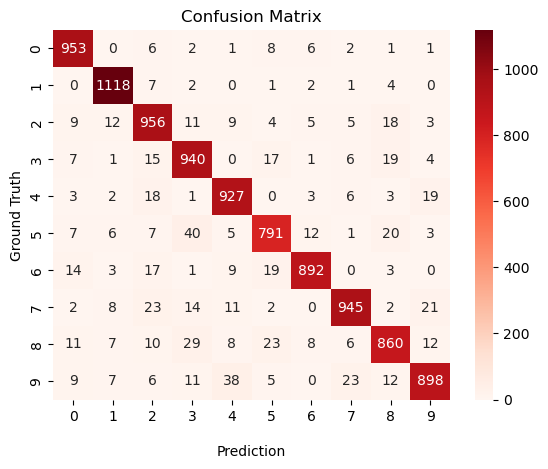

In [47]:
confusion_matrix = cm(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

In [38]:
model_non_linear = SVC(kernel='rbf')
model_non_linear.fit(x_train_scaled, y_train)
y_pred2 = model_non_linear.predict(x_test_scaled)

In [39]:
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy score: "+str(acc2))

Accuracy score: 0.9656


In [49]:
print(cr(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



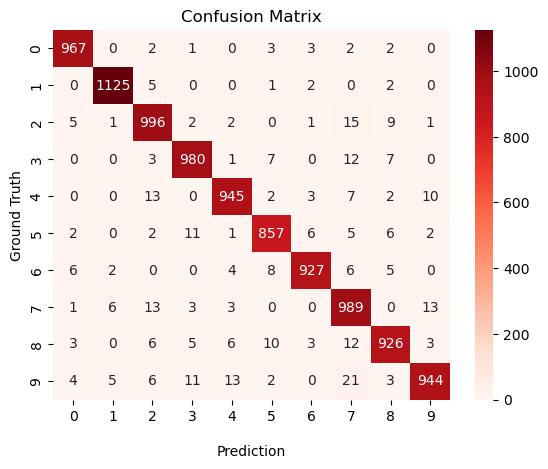

In [50]:
confusion_matrix = cm(y_test,y_pred2)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');